In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('classify_3.csv',encoding="gbk")

In [4]:
data.head()

,date,time,日前电价,直调负荷,联络线受电负荷,风电负荷,光伏总加,自备机组总加,地方电厂发电总加,直调公用,正备用,负备用,quarter
0,2022/1/1,0:15,279.0,60624.3,10030.0,8817.99,0.0,4815,8140,36961.31,18392.6,8051.86,1
1,2022/1/1,0:30,277.0,60527.7,9443.0,8895.40,0.0,4815,8140,37374.30,17979.7,8464.77,2
2,2022/1/1,0:45,277.4,59883.2,9206.0,8969.26,0.0,4815,8140,36892.94,18461.1,7983.40,3
3,2022/1/1,1:00,276.0,59625.4,8969.0,9038.97,0.0,4815,8140,36802.43,18551.6,7892.89,4
4,2022/1/1,1:15,275.0,59367.6,8732.0,9104.96,0.0,4815,8140,36715.64,18638.4,7806.09,5


In [5]:
f1 = data['日前电价']
f2 = data['直调负荷']
f3 = data['联络线受电负荷']
f4 = data['风电负荷']
f5 = data['光伏总加']
f6 = data['直调公用']
f7 = data['正备用']
f8 = data['负备用']
f9 = data['quarter']

In [6]:
length=len(f1)#给定变量值
lookBack = 7*96
pred_num = 1
train_num = length-lookBack-pred_num+1
train_size = 62*96
valid_size = 10*96
test_size = 4*96
size=train_size+valid_size

In [7]:
def createSamples_X(dataset, lookBack, pred_num,day):#取前n天对应点的电价数据
    dataX = np.zeros((1,day)) 
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample = []
        for j in range(day):
            sample_X = dataset[(i+j*96):(i+j*96+1), :]
            sample.append(sample_X)
        sample = np.array(sample).reshape(1,-1)
        dataX = np.vstack((dataX,sample)) 
    dataX = dataX[1:(len(dataset)-lookBack-pred_num+2), :]
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1])) #三维到二维
    return dataX

In [8]:
#取目标值Y或取当点特征
def createSamples_Y(dataset, lookBack, pred_num):
    dataY = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_Y = dataset[(i+lookBack):(i + lookBack+pred_num), :]
        dataY.append(sample_Y)
    dataY = np.array(dataY)  # (N, 1)
    dataY = np.reshape(dataY, (dataY.shape[0], dataY.shape[1]))
    return dataY

In [9]:
#取连续特征值
def createSamples_continuous(dataset, lookBack, pred_num,front, lenthh):
    dataX = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_X = dataset[(i+front):(i+front+lenthh), :]
        dataX.append(sample_X)
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1]))
    return dataX

In [10]:
#划分特征与目标
traffic_target = createSamples_Y(f1.values.reshape(-1, 1), lookBack, pred_num)
traffic_feature_2 = createSamples_Y(f2.values.reshape(-1, 1),lookBack, pred_num) 
traffic_feature_3 = createSamples_Y(f3.values.reshape(-1, 1),lookBack, pred_num)
traffic_feature_4 = createSamples_continuous(f4.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17) 
traffic_feature_5 = createSamples_continuous(f5.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)  
traffic_feature_6 = createSamples_continuous(f6.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_7 = createSamples_continuous(f7.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_8 = createSamples_continuous(f8.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_9 = createSamples_Y(f9.values.reshape(-1, 1),lookBack, pred_num)

traffic_feature_1 = createSamples_X(f1.values.reshape(-1, 1),lookBack, pred_num,6)
traffic_feature_10 = createSamples_continuous(f1.values.reshape(-1, 1),lookBack, pred_num,lookBack-16-96*3,17) 



traffic_feature = np.hstack((traffic_feature_1,traffic_feature_2,traffic_feature_3,traffic_feature_4,
                             traffic_feature_5,traffic_feature_6,traffic_feature_7,traffic_feature_8,
                             traffic_feature_9,traffic_feature_10                          
                            ))


In [11]:
#训练、验证、测试集
y_train = traffic_target[0:train_size,:]
y_valid = traffic_target[train_size:size,:]
y_test = traffic_target[size:train_num,:]
X_train=traffic_feature[0:train_size,:]
X_valid=traffic_feature[train_size:size,:]
X_test=traffic_feature[size:train_num,:]

y_train,y_valid,y_test,X_train,X_valid,X_test

(array([[311.  ],
        [294.  ],
        [277.38],
        ...,
        [682.56],
        [666.8 ],
        [649.56]]),
 array([[324.89],
        [327.51],
        [330.  ],
        [329.24],
        [330.55],
        [330.72],
        [330.49],
        [329.55],
        [330.  ],
        [328.95],
        [329.13],
        [327.72],
        [326.91],
        [326.91],
        [325.98],
        [325.03],
        [327.47],
        [328.98],
        [330.68],
        [333.76],
        [340.9 ],
        [351.22],
        [378.  ],
        [382.4 ],
        [382.  ],
        [404.63],
        [439.15],
        [388.22],
        [338.98],
        [333.59],
        [332.6 ],
        [326.72],
        [326.69],
        [317.49],
        [308.07],
        [300.34],
        [282.  ],
        [220.  ],
        [173.  ],
        [139.  ],
        [113.  ],
        [ 95.34],
        [ 70.57],
        [ 68.59],
        [ 88.36],
        [ 70.  ],
        [-80.  ],
        [-80.  ],
        [-80.

In [13]:
print(y_test)

[[390.5 ]
 [386.4 ]
 [381.67]
 [378.  ]
 [372.74]
 [371.32]
 [366.  ]
 [359.  ]
 [357.68]
 [353.4 ]
 [350.6 ]
 [351.52]
 [351.06]
 [347.02]
 [348.3 ]
 [346.8 ]
 [345.83]
 [352.  ]
 [363.2 ]
 [361.68]
 [375.32]
 [386.4 ]
 [406.  ]
 [414.  ]
 [441.8 ]
 [466.4 ]
 [490.  ]
 [442.  ]
 [443.08]
 [454.65]
 [477.48]
 [510.6 ]
 [547.44]
 [538.64]
 [506.8 ]
 [474.92]
 [449.6 ]
 [434.  ]
 [417.76]
 [408.  ]
 [404.  ]
 [410.  ]
 [407.86]
 [412.  ]
 [416.  ]
 [392.4 ]
 [363.4 ]
 [301.48]
 [283.8 ]
 [265.64]
 [277.88]
 [291.8 ]
 [330.92]
 [338.72]
 [339.52]
 [332.4 ]
 [322.98]
 [313.5 ]
 [312.7 ]
 [312.18]
 [342.5 ]
 [364.8 ]
 [382.83]
 [404.44]
 [414.  ]
 [422.  ]
 [428.  ]
 [424.44]
 [444.36]
 [476.  ]
 [514.6 ]
 [564.4 ]
 [604.  ]
 [673.  ]
 [616.6 ]
 [562.4 ]
 [540.3 ]
 [528.44]
 [522.  ]
 [510.6 ]
 [546.36]
 [564.2 ]
 [585.6 ]
 [607.44]
 [585.  ]
 [544.04]
 [505.88]
 [468.2 ]
 [460.  ]
 [460.  ]
 [455.56]
 [460.6 ]
 [480.8 ]
 [478.86]
 [457.  ]
 [437.52]
 [494.14]
 [509.92]
 [511.8 ]
 [520.  ]


In [15]:
import xgboost as xgb
from sklearn.metrics import r2_score, auc
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_xgb = model.predict(X_test)
#acc=y_test['f1']
#print( r2_score(acc, y_pred) )
print(y_xgb)

[ 413.71304    383.35922    362.39447    323.33405    320.69946
  325.13977    310.5226     302.69882    278.53256    267.9476
  267.4799     267.7049     261.5823     250.62979    257.87595
  260.63498    266.22955    257.4146     263.0433     258.16867
  313.29495    317.8178     392.5058     391.29645    422.2074
  443.2212     469.89462    433.528      437.19696    439.0809
  446.18744    482.51788    499.40796    502.33365    512.0041
  491.9839     476.76993    452.72256    397.25705    399.30167
  404.0579     391.71487    396.97324    390.70953    384.25888
  371.58328    341.86417    302.64734    306.941      335.4297
  320.50037    303.04852    299.66602    298.65494    308.40833
  306.5978     331.8609     340.72528    335.31134    342.27637
  335.25735    391.5882     417.82144    421.6382     413.40204
  433.79013    432.72247    467.09796    480.56927    523.936
  593.45294    602.0052     639.18665    639.0274     618.60345
  580.58734    574.4486     540.2146     536.89

In [16]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')

acc=test0['日前电价']

In [17]:
print( r2_score(acc, y_xgb))

0.5812412845285795


In [19]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print(r2_score(acc, y_xgb))
print ('均方差',mean_squared_error(acc,y_xgb))
print ('绝对差',mean_absolute_error(acc,y_xgb))
print ('解释度',explained_variance_score(acc,y_xgb))

0.5812412845285795
均方差 15018.160449698631
绝对差 95.91865214323006
解释度 0.7369594692440808


In [20]:
mape=np.abs((acc-y_xgb)/((acc+y_xgb)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.8726169408579038


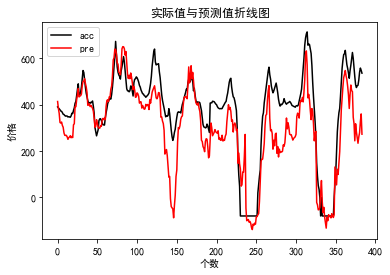

In [21]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_xgb,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [22]:
result=list(y_xgb)
result=list(map(lambda x: x + 1, result))
test0["日前电价"]=result
test0.to_csv("pre_xgb1.csv", index=False)

In [31]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train, y_train)
# 回归测试集预测
y_Ada = AdaBoost.predict(X_test) 


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')
acc=test0['日前电价']
mse = mean_squared_error(acc, y_Ada)
#print("预测结果", y_Ada)
print("均方误差 = ",round(mse,2))


均方误差 =  12192.41


In [36]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_Ada))
print ('均方差',mean_squared_error(acc,y_Ada))
print ('绝对差',mean_absolute_error(acc,y_Ada))
print ('解释度',explained_variance_score(acc,y_Ada))

0.6600330057828785
均方差 12192.412188977954
绝对差 90.38148928341415
解释度 0.735788818448103


In [37]:
mape=np.abs((acc-y_Ada)/((acc+y_Ada)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.5810806824012693


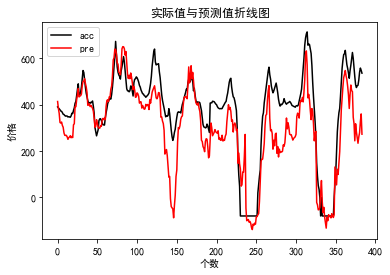

In [39]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color=(0,0,0),label="acc") #颜色表示
plt.plot(y_xgb,color="r",label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [41]:
from sklearn.model_selection import KFold, RepeatedKFold
import lightgbm as lgb

param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7720.59	valid_1's l2: 8738.89
[400]	training's l2: 4095.35	valid_1's l2: 5481.55
[600]	training's l2: 2944.58	valid_1's l2: 4501.09
[800]	training's l2: 2262.64	valid_1's l2: 3928.4
[1000]	training's l2: 1780.51	valid_1's l2: 3486.1
[1200]	training's l2: 1437.35	valid_1's l2: 3174.49
[1400]	training's l2: 1178.64	valid_1's l2: 2930.49
[1600]	training's l2: 982.158	valid_1's l2: 2734.27
[1800]	training's l2: 832.279	valid_1's l2: 2579.05
[2000]	training's l2: 712.721	valid_1's l2: 2449.19
[2200]	training's l2: 616.831	valid_1's l2: 2341.87
[2400]	training's l2: 533.056	valid_1's l2: 2245.05
[2600]	training's l2: 466.8	valid_1's l2: 2167.76
[2800]	training's l2: 409.203	valid_1's l2: 2097.39
[3000]	training's l2: 360.682	valid_1's l2: 2033.07
[3200]	training's l2: 319.934	valid

[9000]	training's l2: 30.9658	valid_1's l2: 1692.32
[9200]	training's l2: 29.0884	valid_1's l2: 1687.08
[9400]	training's l2: 27.2988	valid_1's l2: 1682.48
[9600]	training's l2: 25.6942	valid_1's l2: 1678.24
[9800]	training's l2: 24.2042	valid_1's l2: 1674.64
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
Did not meet early stopping. Best iteration is:
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
fold n°4
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7674.73	valid_1's l2: 9086.47
[400]	training's l2: 4142.07	valid_1's l2: 5929.03
[600]	training's l2: 2988.32	valid_1's l2: 4922.85
[800]	training's l2: 2309.6	valid_1's l2: 4297.5
[1000]	training's l2: 1820.37	valid_1's l2: 3836.88
[1200]	training's l2: 1476.28	valid_1's l2: 3477.12
[1400]	training's l2: 1220.3	valid_1's l2: 3199.46
[1600]	training's l2: 1018.8	valid_1

In [42]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ('均方差',mean_squared_error(acc,predictions_lgb))
print ('绝对差',mean_absolute_error(acc,predictions_lgb))
print ('解释度',explained_variance_score(acc,predictions_lgb))

均方差 14390.618566261595
绝对差 95.45162004922491
解释度 0.775224485048607


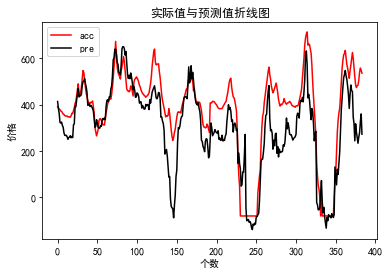

In [43]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(y_pred,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [44]:
mape=np.abs((acc-y_pred)/((acc+y_pred)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.8726169408579038


In [22]:
print(X_test)

[[516.   230.64 672.34 ... 659.   634.44 464.  ]
 [520.04 209.   735.4  ... 634.44 464.   442.  ]
 [504.   197.96 754.   ... 464.   442.   430.  ]
 ...
 [693.28 412.52 674.64 ... 460.6  480.8  478.86]
 [659.   396.   664.   ... 480.8  478.86 457.  ]
 [634.44 377.24 642.8  ... 478.86 457.   437.52]]


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()
#y_train = y_train.values.ravel()
gbdt.fit(X_train, y_train.astype('int'))

pred = gbdt.predict(X_test)
#acc=test['price1']

C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [33]:
from sklearn.metrics import r2_score, auc
model = xgb.XGBRegressor()#max_depth=6,learning_rate=0.05,n_estimators=100,randam_state=42
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
#acc=test['price1']
print( r2_score(acc, y_pred) )


0.9999701403788294


In [34]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_pred2))
print ('均方差',mean_squared_error(acc,y_pred2))
print ('绝对差',mean_absolute_error(acc,y_pred2))
print ('解释度',explained_variance_score(acc,y_pred2))

0.9999701403788294
均方差 1.0
绝对差 1.0
解释度 1.0


In [ ]:
X_train_ = data[:train.shape[0]]
X_test_  = data[train.shape[0]:]

In [37]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold
param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20


D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7720.59	valid_1's l2: 8738.89
[400]	training's l2: 4095.35	valid_1's l2: 5481.55
[600]	training's l2: 2944.58	valid_1's l2: 4501.09
[800]	training's l2: 2262.64	valid_1's l2: 3928.4
[1000]	training's l2: 1780.51	valid_1's l2: 3486.1
[1200]	training's l2: 1437.35	valid_1's l2: 3174.49
[1400]	training's l2: 1178.64	valid_1's l2: 2930.49
[1600]	training's l2: 982.158	valid_1's l2: 2734.27
[1800]	training's l2: 832.279	valid_1's l2: 2579.05
[2000]	training's l2: 712.721	valid_1's l2: 2449.19
[2200]	training's l2: 616.831	valid_1's l2: 2341.87
[2400]	training's l2: 533.056	valid_1's l2: 2245.05
[2600]	training's l2: 466.8	valid_1's l2: 2167.76
[2800]	training's l2: 409.203	valid_1's l2: 2097.39
[3000]	training's l2: 360.682	valid_1's l2: 2033.07
[3200]	training's l2: 319.934	valid_1's l2: 1979.13
[3400]	training's l2: 284.196	valid_1's l2: 1930.24
[3600]	training's l2: 255.849	valid_1's l2: 1888.87
[3800]	tra

[9400]	training's l2: 27.2988	valid_1's l2: 1682.48
[9600]	training's l2: 25.6942	valid_1's l2: 1678.24
[9800]	training's l2: 24.2042	valid_1's l2: 1674.64
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
Did not meet early stopping. Best iteration is:
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
fold n°4
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7674.73	valid_1's l2: 9086.47
[400]	training's l2: 4142.07	valid_1's l2: 5929.03
[600]	training's l2: 2988.32	valid_1's l2: 4922.85
[800]	training's l2: 2309.6	valid_1's l2: 4297.5
[1000]	training's l2: 1820.37	valid_1's l2: 3836.88
[1200]	training's l2: 1476.28	valid_1's l2: 3477.12
[1400]	training's l2: 1220.3	valid_1's l2: 3199.46
[1600]	training's l2: 1018.8	valid_1's l2: 2967.84
[1800]	training's l2: 862.304	valid_1's l2: 2781.82
[2000]	training's l2: 737.357	valid_1

In [39]:
#y_pred3 = model.predict(X_test)
#acc=test['price1']
print( r2_score(acc, predictions_lgb) )


0.9463408194798414


[ 3.87228642e+02  3.82760630e+02  3.78662479e+02  3.70273027e+02
  3.41148058e+02  3.30481336e+02  3.22565784e+02  3.16118117e+02
  3.07800294e+02  3.02694132e+02  2.80072859e+02  2.72036911e+02
  2.70413248e+02  2.67978648e+02  2.78221205e+02  2.80928405e+02
  2.81635804e+02  2.82436853e+02  2.92035054e+02  2.96916191e+02
  3.11249857e+02  3.25636352e+02  3.61963466e+02  3.78501497e+02
  4.01886250e+02  4.35119340e+02  4.39894489e+02  4.23170252e+02
  4.35761640e+02  4.54206602e+02  4.67390217e+02  4.95742660e+02
  5.18551501e+02  5.24047836e+02  5.07671531e+02  4.86271070e+02
  4.76677274e+02  4.65558234e+02  4.50222789e+02  4.36760744e+02
  4.38007424e+02  4.44107208e+02  4.52379923e+02  4.45246950e+02
  4.40106286e+02  4.04701480e+02  3.66549218e+02  3.34240381e+02
  3.08906535e+02  3.01838467e+02  3.02550547e+02  3.03114418e+02
  3.16215303e+02  3.20778206e+02  3.25447955e+02  3.34274179e+02
  3.28193357e+02  3.31966590e+02  3.39339137e+02  3.39293263e+02
  3.79755359e+02  4.19125

In [40]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, predictions_lgb))
print ('均方差',mean_squared_error(acc,predictions_lgb))
print ('绝对差',mean_absolute_error(acc,predictions_lgb))
print ('解释度',explained_variance_score(acc,predictions_lgb))

0.9463408194798414
均方差 1797.0482684129593
绝对差 29.989346553343577
解释度 0.9473547386417727


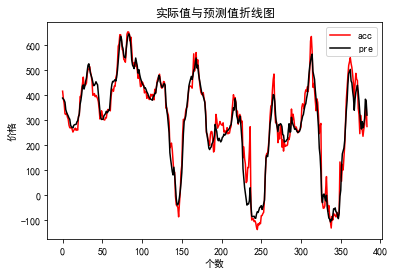

In [41]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(predictions_lgb,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [42]:
mape=np.abs((acc-y_pred)/((acc+y_pred)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.00591544235013028


In [43]:
import catboost
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import r2_score, auc
model = catboost.CatBoostRegressor()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)
#acc=test['price1']
print( r2_score(acc, y_pred4) )

Learning rate set to 0.054272
0:	learn: 230.6140391	total: 228ms	remaining: 3m 47s
1:	learn: 222.3948326	total: 253ms	remaining: 2m 6s
2:	learn: 214.6538394	total: 278ms	remaining: 1m 32s
3:	learn: 207.5709333	total: 303ms	remaining: 1m 15s
4:	learn: 200.9024499	total: 328ms	remaining: 1m 5s
5:	learn: 194.4848250	total: 353ms	remaining: 58.4s
6:	learn: 188.6426487	total: 377ms	remaining: 53.5s
7:	learn: 182.8896290	total: 397ms	remaining: 49.2s
8:	learn: 177.4285830	total: 426ms	remaining: 46.9s
9:	learn: 172.3335635	total: 451ms	remaining: 44.6s
10:	learn: 167.4882198	total: 475ms	remaining: 42.7s
11:	learn: 163.3695020	total: 497ms	remaining: 40.9s
12:	learn: 159.2168407	total: 521ms	remaining: 39.5s
13:	learn: 155.2298026	total: 542ms	remaining: 38.1s
14:	learn: 151.6068751	total: 564ms	remaining: 37s
15:	learn: 148.1964319	total: 585ms	remaining: 35.9s
16:	learn: 144.8133394	total: 606ms	remaining: 35s
17:	learn: 141.7578303	total: 630ms	remaining: 34.4s
18:	learn: 138.8510342	tota

161:	learn: 71.2764489	total: 4s	remaining: 20.7s
162:	learn: 71.0872816	total: 4.02s	remaining: 20.7s
163:	learn: 70.8971008	total: 4.04s	remaining: 20.6s
164:	learn: 70.7468877	total: 4.07s	remaining: 20.6s
165:	learn: 70.6525436	total: 4.09s	remaining: 20.5s
166:	learn: 70.5248327	total: 4.11s	remaining: 20.5s
167:	learn: 70.3579612	total: 4.13s	remaining: 20.5s
168:	learn: 70.2205454	total: 4.15s	remaining: 20.4s
169:	learn: 69.9817455	total: 4.17s	remaining: 20.4s
170:	learn: 69.8785378	total: 4.21s	remaining: 20.4s
171:	learn: 69.7822578	total: 4.23s	remaining: 20.4s
172:	learn: 69.6420948	total: 4.25s	remaining: 20.3s
173:	learn: 69.4295540	total: 4.28s	remaining: 20.3s
174:	learn: 69.2099444	total: 4.3s	remaining: 20.3s
175:	learn: 69.0309943	total: 4.32s	remaining: 20.2s
176:	learn: 68.7529639	total: 4.34s	remaining: 20.2s
177:	learn: 68.5854228	total: 4.36s	remaining: 20.1s
178:	learn: 68.4096373	total: 4.39s	remaining: 20.1s
179:	learn: 68.1993954	total: 4.41s	remaining: 20.

321:	learn: 50.9323637	total: 8.18s	remaining: 17.2s
322:	learn: 50.8279201	total: 8.21s	remaining: 17.2s
323:	learn: 50.7281867	total: 8.23s	remaining: 17.2s
324:	learn: 50.6440022	total: 8.25s	remaining: 17.1s
325:	learn: 50.5508868	total: 8.28s	remaining: 17.1s
326:	learn: 50.4967664	total: 8.31s	remaining: 17.1s
327:	learn: 50.4060095	total: 8.34s	remaining: 17.1s
328:	learn: 50.2844249	total: 8.37s	remaining: 17.1s
329:	learn: 50.2325606	total: 8.41s	remaining: 17.1s
330:	learn: 50.1548905	total: 8.44s	remaining: 17.1s
331:	learn: 50.0891902	total: 8.46s	remaining: 17s
332:	learn: 50.0299902	total: 8.49s	remaining: 17s
333:	learn: 49.9750069	total: 8.52s	remaining: 17s
334:	learn: 49.9262782	total: 8.55s	remaining: 17s
335:	learn: 49.8681758	total: 8.59s	remaining: 17s
336:	learn: 49.7959640	total: 8.62s	remaining: 16.9s
337:	learn: 49.6913232	total: 8.64s	remaining: 16.9s
338:	learn: 49.6253003	total: 8.67s	remaining: 16.9s
339:	learn: 49.5601320	total: 8.7s	remaining: 16.9s
340:

478:	learn: 39.6831341	total: 12.6s	remaining: 13.7s
479:	learn: 39.6311005	total: 12.6s	remaining: 13.7s
480:	learn: 39.5599666	total: 12.6s	remaining: 13.6s
481:	learn: 39.5060140	total: 12.7s	remaining: 13.6s
482:	learn: 39.4475448	total: 12.7s	remaining: 13.6s
483:	learn: 39.3678419	total: 12.7s	remaining: 13.6s
484:	learn: 39.3229646	total: 12.8s	remaining: 13.5s
485:	learn: 39.2308713	total: 12.8s	remaining: 13.5s
486:	learn: 39.1552595	total: 12.8s	remaining: 13.5s
487:	learn: 39.1245752	total: 12.8s	remaining: 13.5s
488:	learn: 39.0662699	total: 12.9s	remaining: 13.4s
489:	learn: 39.0080520	total: 12.9s	remaining: 13.4s
490:	learn: 38.9565981	total: 12.9s	remaining: 13.4s
491:	learn: 38.8982303	total: 12.9s	remaining: 13.4s
492:	learn: 38.8738272	total: 13s	remaining: 13.3s
493:	learn: 38.8425440	total: 13s	remaining: 13.3s
494:	learn: 38.7991105	total: 13s	remaining: 13.3s
495:	learn: 38.7360273	total: 13.1s	remaining: 13.3s
496:	learn: 38.6989228	total: 13.1s	remaining: 13.2s

635:	learn: 32.3427812	total: 16.8s	remaining: 9.6s
636:	learn: 32.3308111	total: 16.8s	remaining: 9.57s
637:	learn: 32.2778803	total: 16.8s	remaining: 9.54s
638:	learn: 32.2203377	total: 16.8s	remaining: 9.52s
639:	learn: 32.1963713	total: 16.9s	remaining: 9.48s
640:	learn: 32.1344607	total: 16.9s	remaining: 9.46s
641:	learn: 32.1004508	total: 16.9s	remaining: 9.43s
642:	learn: 32.0674911	total: 16.9s	remaining: 9.4s
643:	learn: 32.0207006	total: 17s	remaining: 9.37s
644:	learn: 31.9912113	total: 17s	remaining: 9.34s
645:	learn: 31.9712202	total: 17s	remaining: 9.31s
646:	learn: 31.9462085	total: 17s	remaining: 9.29s
647:	learn: 31.8991754	total: 17s	remaining: 9.26s
648:	learn: 31.8489615	total: 17.1s	remaining: 9.23s
649:	learn: 31.7981947	total: 17.1s	remaining: 9.2s
650:	learn: 31.7722779	total: 17.1s	remaining: 9.17s
651:	learn: 31.7261768	total: 17.1s	remaining: 9.14s
652:	learn: 31.6780331	total: 17.1s	remaining: 9.11s
653:	learn: 31.6487061	total: 17.2s	remaining: 9.08s
654:	l

794:	learn: 27.3319564	total: 20.3s	remaining: 5.23s
795:	learn: 27.2994307	total: 20.3s	remaining: 5.21s
796:	learn: 27.2669660	total: 20.3s	remaining: 5.18s
797:	learn: 27.2325385	total: 20.4s	remaining: 5.15s
798:	learn: 27.1934784	total: 20.4s	remaining: 5.13s
799:	learn: 27.1647044	total: 20.4s	remaining: 5.1s
800:	learn: 27.1447650	total: 20.4s	remaining: 5.07s
801:	learn: 27.1174018	total: 20.5s	remaining: 5.05s
802:	learn: 27.1050018	total: 20.5s	remaining: 5.02s
803:	learn: 27.0812164	total: 20.5s	remaining: 5s
804:	learn: 27.0609742	total: 20.5s	remaining: 4.97s
805:	learn: 27.0343804	total: 20.5s	remaining: 4.94s
806:	learn: 27.0067401	total: 20.6s	remaining: 4.92s
807:	learn: 26.9745766	total: 20.6s	remaining: 4.89s
808:	learn: 26.9392102	total: 20.6s	remaining: 4.86s
809:	learn: 26.9090037	total: 20.6s	remaining: 4.84s
810:	learn: 26.8667532	total: 20.6s	remaining: 4.81s
811:	learn: 26.8363143	total: 20.7s	remaining: 4.79s
812:	learn: 26.8099829	total: 20.7s	remaining: 4.7

950:	learn: 23.6590406	total: 23.7s	remaining: 1.22s
951:	learn: 23.6328380	total: 23.7s	remaining: 1.2s
952:	learn: 23.6176652	total: 23.8s	remaining: 1.17s
953:	learn: 23.5981584	total: 23.8s	remaining: 1.15s
954:	learn: 23.5758798	total: 23.8s	remaining: 1.12s
955:	learn: 23.5642733	total: 23.8s	remaining: 1.1s
956:	learn: 23.5474506	total: 23.9s	remaining: 1.07s
957:	learn: 23.5315628	total: 23.9s	remaining: 1.05s
958:	learn: 23.4983329	total: 23.9s	remaining: 1.02s
959:	learn: 23.4722975	total: 23.9s	remaining: 997ms
960:	learn: 23.4577432	total: 23.9s	remaining: 972ms
961:	learn: 23.4302250	total: 24s	remaining: 947ms
962:	learn: 23.4122974	total: 24s	remaining: 922ms
963:	learn: 23.3829386	total: 24s	remaining: 896ms
964:	learn: 23.3564319	total: 24s	remaining: 871ms
965:	learn: 23.3322719	total: 24s	remaining: 846ms
966:	learn: 23.3039577	total: 24.1s	remaining: 821ms
967:	learn: 23.2798944	total: 24.1s	remaining: 796ms
968:	learn: 23.2585988	total: 24.1s	remaining: 771ms
969:	

In [44]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print( r2_score(acc, y_pred4))
print ('均方差',mean_squared_error(acc,y_pred4))
print ('绝对差',mean_absolute_error(acc,y_pred4))
print ('解释度',explained_variance_score(acc,y_pred4))

0.9292877666356574
均方差 2368.1557431773713
绝对差 36.85595987166338
解释度 0.9292900799635058


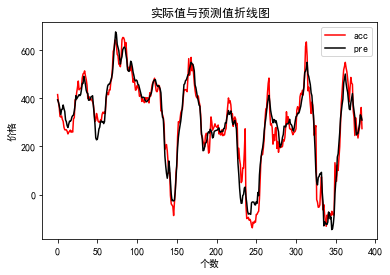

In [45]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(y_pred4,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [46]:
mape=np.abs((acc-y_pred4)/((acc+y_pred4)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.423270625538664
